In [41]:
cd C:\Shruthi\Udemy_Course_Mine\Deep_Learning_AZ_HandsOn_ANN\Deep_Learning_A_Z\V1_SDL\Part 3 - RNN\Section 10 - Part 3 - RNN

C:\Shruthi\Udemy_Course_Mine\Deep_Learning_AZ_HandsOn_ANN\Deep_Learning_A_Z\V1_SDL\Part 3 - RNN\Section 10 - Part 3 - RNN


In [42]:
cd C:\Users\shrut\Anaconda3\lib\site-packages\keras

[WinError 2] The system cannot find the file specified: 'C:\\Users\\shrut\\Anaconda3\\lib\\site-packages\\keras'
C:\Shruthi\Udemy_Course_Mine\Deep_Learning_AZ_HandsOn_ANN\Deep_Learning_A_Z\V1_SDL\Part 3 - RNN\Section 10 - Part 3 - RNN


Part 1 - Data Preprocessing


Part 2 - Building the RNN


Part 3 - Making Predictions and Visualising the results

In [43]:
## Data Preprocessing

# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping 
x_train = np.reshape(x_train, (1198, 60, 1))

In [51]:
## Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initiaze the RNN
regressor = Sequential()

## Adding the first LSTM layer and dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
regressor.add(Dropout(rate = 0.20))

## Adding the second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.20))

## Adding the third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.20))

## Adding the fourth LSTM layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.20))

## Adding the output layer
regressor.add(Dense(units = 1))

## Compiling RNN
regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

## Fitting the RNN to the Training set
regressor.fit(x=x_train, y=y_train, batch_size=32, epochs=100)


Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0545 - accuracy: 0.0017
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0065 - accuracy: 0.0017
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0059 - accuracy: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0064 - accuracy: 0.0017
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053 - accuracy: 0.0017
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051 - accuracy: 0.0017
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045 - accuracy: 0.0017
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - l

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0019 - accuracy: 0.0017
Epoch 80/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 81/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 82/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 83/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 84/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 85/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 86/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 87/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 88/100
1198/1198 [==============================] - 4s 3ms/step - loss:

No handles with labels found to put in legend.


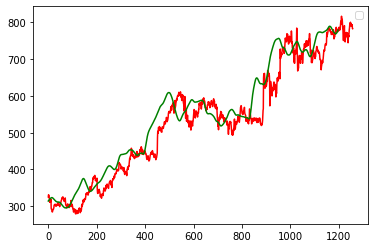

In [50]:
## Making the predictions and visualizing the results

#Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock = dataset_train.iloc[:, 1:2].values

#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []

for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
        
x_test = np.array(x_train)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_stock = regressor.predict(x_test)
pred_stock = sc.inverse_transform(pred_stock)

#Visualizing the RNN model
plt.plot(real_stock, color = 'red')
plt.plot(pred_stock, color = 'green')
plt.legend()